In [ ]:
# move the kaggle.json to the Right Directory and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Download the dataset
!kaggle datasets download -d gauravtopre/bank-customer-churn-dataset


Dataset URL: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset
License(s): other
  0% 0.00/187k [00:00<?, ?B/s]
100% 187k/187k [00:00<00:00, 346MB/s]


In [ ]:
# Unzip the dataset
!unzip -q bank-customer-churn-dataset.zip

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score


In [ ]:
# Load with pandas
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.isna().sum().any()

np.False_

In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [ ]:
df.drop("customer_id", axis=1, inplace=True)

In [ ]:
df.shape

(10000, 11)

In [ ]:
df.country.value_counts()

,count
country,
France,5014
Germany,2509
Spain,2477


# **Encode Categorical Variables**
Use Label Encoding for gender and One-Hot Encoding for country.

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # Male=1, Female=0

df = pd.get_dummies(df, columns=['country'], drop_first=True)


# **Exploratory Data Analysis**

> ## 1. Churn Distribution

/tmp/ipython-input-64-2702719599.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='churn', palette='Set2')


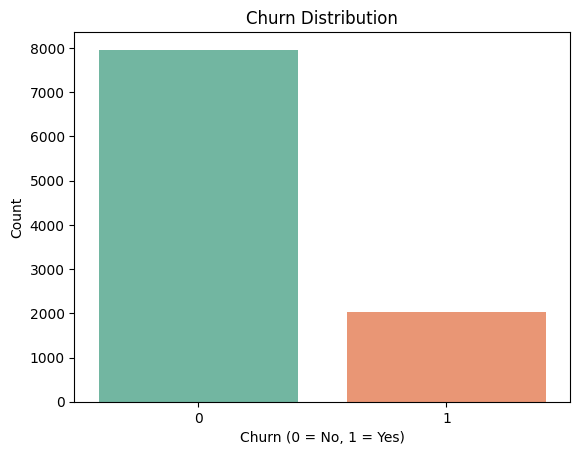

In [ ]:
sns.countplot(data=df, x='churn', palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


In [ ]:
df[['country_Spain', 'country_Germany']] = df[['country_Spain', 'country_Germany']].astype(int)


In [ ]:
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


> ## 2. Churn by Gender

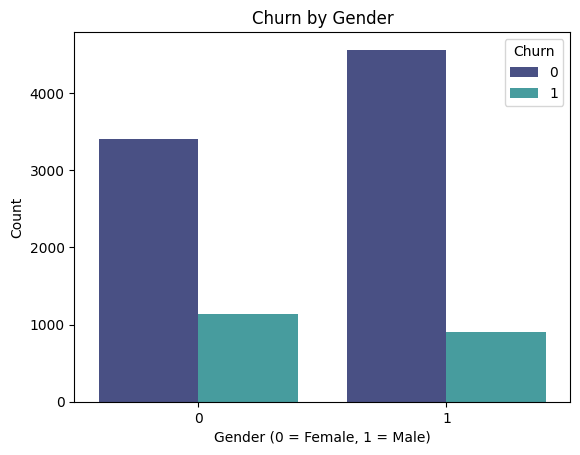

In [ ]:
sns.countplot(data=df, x='gender', hue='churn', palette="mako")
plt.title('Churn by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


> ## 3. Churn by Country

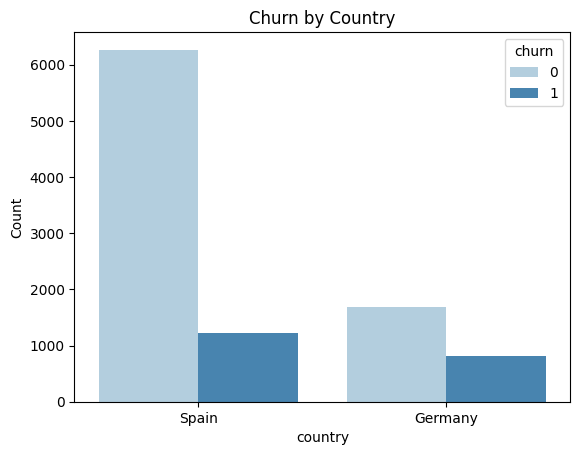

In [ ]:
# Recreate 'country' column from one-hot encoded columns
df['country'] = df[['country_Spain', 'country_Germany']].idxmax(axis=1).str.replace('country_', '')


sns.countplot(data=df, x='country', hue='churn', palette='Blues')
plt.title('Churn by Country')
plt.ylabel('Count')
plt.show()



> ## 4. Box Plot of Age vs Churn

> Examine if certain age groups are more likely to churn.


/tmp/ipython-input-88-3194215781.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='age', palette="mako")


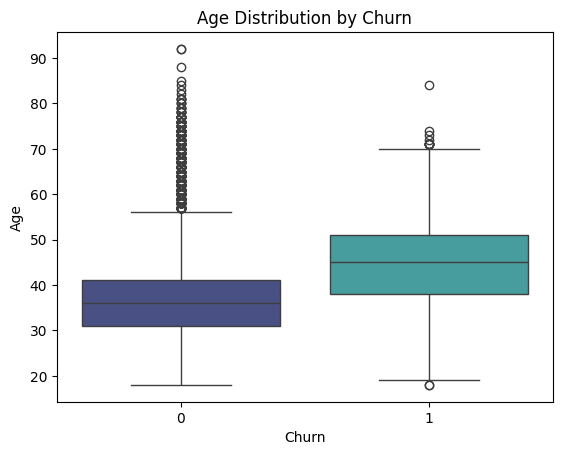

In [ ]:
sns.boxplot(data=df, x='churn', y='age', palette="mako")
plt.title('Age Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()


> ##  5. Correlation Heatmap (Numerical Features Only)


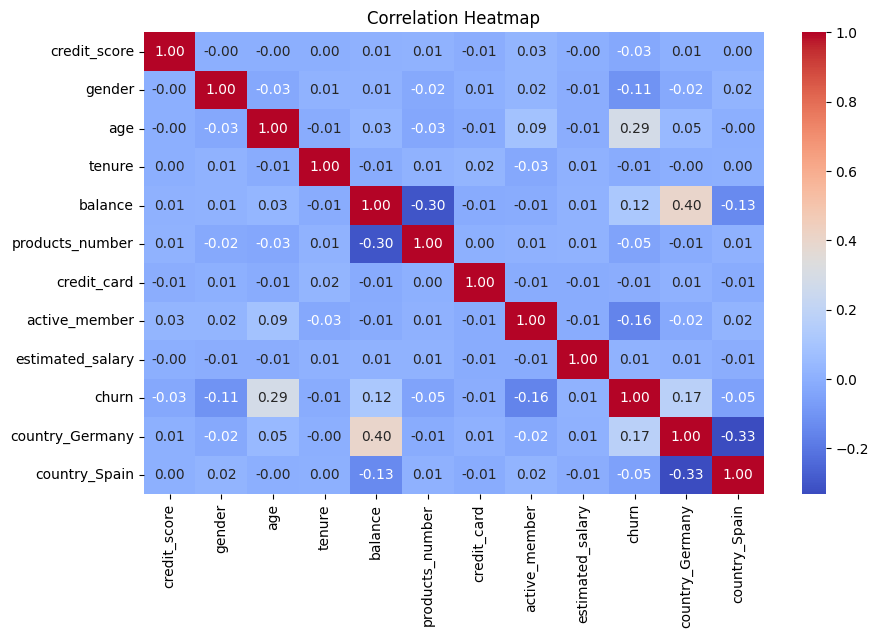

In [ ]:
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


> ## 6. Pairplot

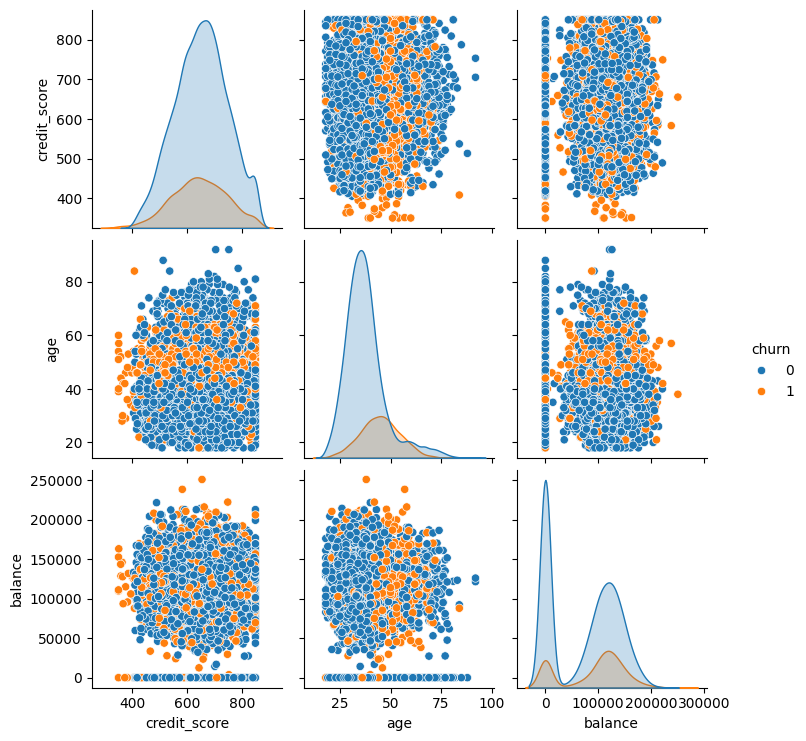

In [ ]:
sns.pairplot(df[['credit_score', 'age', 'balance', 'churn']], hue='churn')
plt.show()


> ## Active Member vs. Churn


> Check if being an active member impacts churn likelihood.

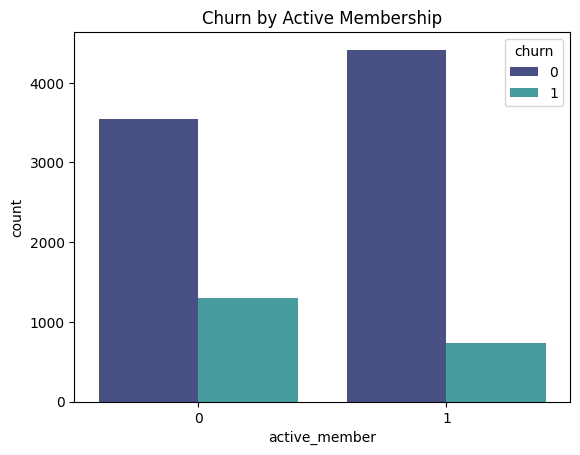

In [ ]:

sns.countplot(data=df, x='active_member', hue='churn', palette="mako")
plt.title('Churn by Active Membership')
plt.show()

> ## Balance Distribution by Churn


>Identify if higher or lower balances influence churn rates.

> ## Histogram of Credit Scores

> Visualize the spread and skewness of customer credit scores.


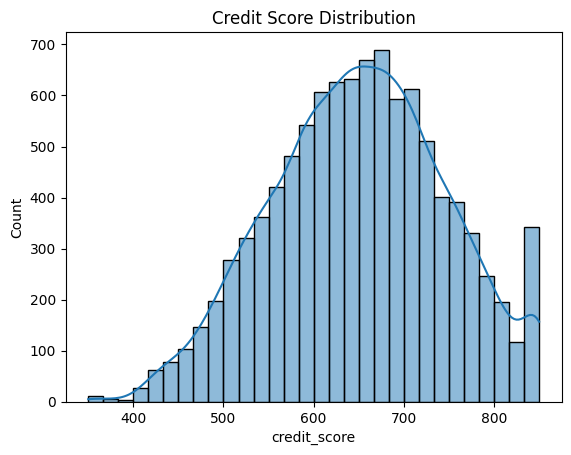

In [ ]:

sns.histplot(data=df, x='credit_score', bins=30, kde=True)
plt.title('Credit Score Distribution')
plt.show()

# Insight:

/tmp/ipython-input-93-2054604332.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='balance', palette="mako")


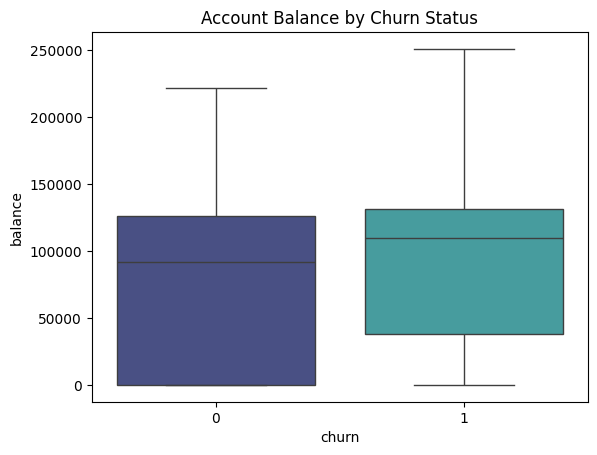

In [ ]:
sns.boxplot(data=df, x='churn', y='balance', palette="mako")
plt.title('Account Balance by Churn Status')
plt.show()



### Key Features Influencing Churn

- **credit_score**: Lower scores may correlate with higher churn.
- **age**: Younger or older groups may show different loyalty patterns.
- **balance**: Very low or high balances can relate to disengagement.
- **Inactivity**: Inactive members are often at risk.
- **products_number**: More products often mean stronger relationships.


# **Split the data into test and train set**

In [ ]:
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
X.columns

Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'country_Germany',
       'country_Spain'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [ ]:

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC‑AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))


[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

ROC‑AUC: 0.7788998829864888


# Train Random Forest

In [ ]:
# Create the model with class_weight='balanced'
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)


In [ ]:
# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC‑AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))


Confusion Matrix:
 [[1552   55]
 [ 213  180]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

ROC‑AUC: 0.860295526410377


## Apply Grid Search for Random Forest

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}


In [ ]:

# Setup GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc',  # ROC-AUC works well for imbalance
                           n_jobs=-1,
                           verbose=1)



In [ ]:
# Fit to training data
grid_search.fit(X_train, y_train)

In [ ]:
best_rf = grid_search.best_estimator_

In [ ]:
# Evaluate on test data
y_pred_best = best_rf.predict(X_test)

In [ ]:

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Confusion Matrix:
 [[1427  180]
 [ 127  266]]


In [ ]:

print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      1607
           1       0.60      0.68      0.63       393

    accuracy                           0.85      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.86      0.85      0.85      2000



In [ ]:

print("ROC‑AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

ROC‑AUC: 0.8685189319627394


In [ ]:
import pickle

# Save
with open('churn_model_rf.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

# Load
with open('churn_model_rf.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [ ]:
# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


# Load the scaler
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

## Feature Importance Plot

> Analyze feature importance to understand what influences churn.

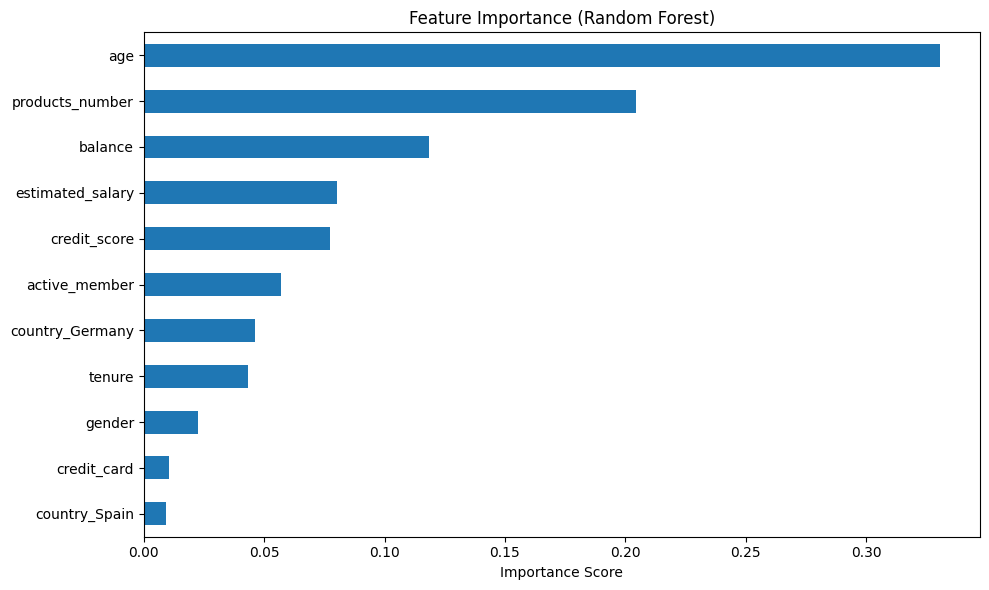

In [ ]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


🔍 Customer Churn Insights from Behavioral Data
This pairplot reveals key patterns in bank customer behavior:

Age is a strong churn signal: Older customers (especially over 50) show a higher tendency to leave.

High balances don’t guarantee loyalty: Some well-funded clients still churn—possibly due to service dissatisfaction.

Credit score alone isn't decisive: Churn happens across all credit score levels.

🧠 Takeaway: Retention strategies should focus on older and high-balance customers with personalized engagement—not just financial metrics.